In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2025-08-19 15:25:55.549576: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-19 15:25:55.638626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755597355.682082    4585 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755597355.695349    4585 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755597355.753442    4585 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_onehot=pd.get_dummies(insurance, drop_first=False, dtype=int)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [4]:
#create a features and labels(x & y)
x=insurance_onehot.drop(["charges"],axis=1)
y=insurance_onehot["charges"]
print(f"first:{x}")
print(f"second:{y}")

first:      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0           1         0          0           1   
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   
1336   21  25.800         0           1         0          1           0   
1337   61  29.070         0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0 

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1070, 11), (1070,), (268, 11), (268,))

In [6]:
#built a nn model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100


I0000 00:00:1755597359.767637    4585 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1725 MB memory:  -> device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1755597360.365490    5636 service.cc:152] XLA service 0x7f24ec006ac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755597360.365506    5636 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX350, Compute Capability 6.1
2025-08-19 15:26:00.406796: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1755597360.495716    5636 cuda_dnn.cc:529] Loaded cuDNN version 91002


 1/34 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 15846.7969 - mae: 15846.7969

I0000 00:00:1755597360.978482    5636 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 10159.4395 - mae: 10159.4395
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7665.6401 - mae: 7665.6401 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7765.9062 - mae: 7765.9062 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7843.6572 - mae: 7843.6572 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7820.1123 - mae: 7820.1123 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7240.0767 - mae: 7240.0767 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7833.7441 - mae: 7833.7441 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7922.3652 - mae: 7922.3652 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7186.5474 - mae: 7186.5474 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7852.8931 - mae: 7852.8931 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7310.4331 - mae: 7310.4331 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [7]:
insurance_model.evaluate(xtest,ytest)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7322.4678 - mae: 7322.4678


[7240.35595703125, 7240.35595703125]

In [8]:
#new model with extra layer
tf.random.set_seed(42)
insurance_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
insurance_model2.fit(xtrain,ytrain,epochs=100,verbose=0)


In [9]:
insurance_model2.evaluate(xtest,ytest),insurance_model.evaluate(xtest,ytest)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5141.5322 - mae: 5141.5322
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7322.4678 - mae: 7322.4678 


([4986.3798828125, 4986.3798828125], [7240.35595703125, 7240.35595703125])

In [10]:
#another model with extra epochs
tf.random.set_seed(42)
insurance_model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
history=insurance_model3.fit(xtrain,ytrain,epochs=200,verbose=0)

In [11]:
print(f"model 1 evaluation:{insurance_model.evaluate(xtest,ytest)}")
print(f"model 2 evaluation:{insurance_model2.evaluate(xtest,ytest)}")
print(f"model 3 evaluation:{insurance_model3.evaluate(xtest,ytest)}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7322.4678 - mae: 7322.4678 
model 1 evaluation:[7240.35595703125, 7240.35595703125]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5141.5322 - mae: 5141.5322 
model 2 evaluation:[4986.3798828125, 4986.3798828125]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3453.5635 - mae: 3453.5635
model 3 evaluation:[3388.00537109375, 3388.00537109375]


Text(0.5, 0, 'epochs')

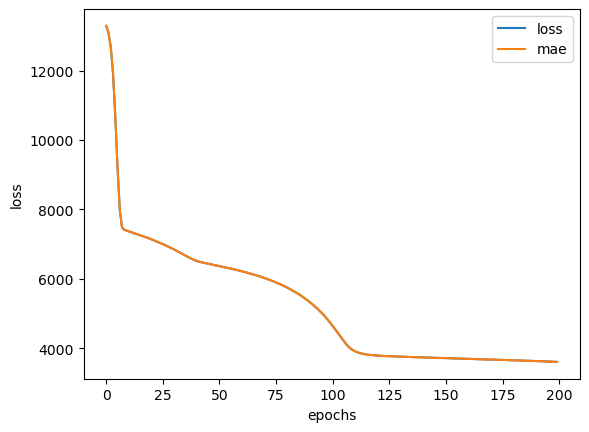

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [16]:
#preprocessing  the data(normalization or standardization)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
#create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
x=data.drop("charges",axis=1)
y=data["charges"]

xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2,random_state=42)

#fit ct to our training data
ct.fit(xtrain1)

#transfrom training and test data with normalization and one hot encoder
xtrain_normal = ct.transform(xtrain1)
xtest_normal=ct.transform(xtest1)


In [19]:
xtrain1.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [20]:
xtrain_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [21]:
xtrain1.shape,xtrain_normal.shape

((1070, 6), (1070, 11))

In [25]:
#now we have normalized and one hoted the dataet..lets create a nn model now
tf.random.set_seed(42)
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model1.fit(xtrain_normal,ytrain1,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 13297.1299 - mae: 13297.1299
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13288.8047 - mae: 13288.8047
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13267.9814 - mae: 13267.9814
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13224.3682 - mae: 13224.3682
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13147.0928 - mae: 13147.0928
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13025.0557 - mae: 13025.0557
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12847.5840 - mae: 12847.5840
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12604.7207 - mae: 12604.7207
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12286.8379 - mae: 12286.8379
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11888.1572 - mae: 11888.1572
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11417.4365 - mae: 11417.4365
Epoch 12/100
34/34 ━━━━━━━━━━

In [26]:
model1.evaluate(xtest_normal,ytest1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3515.3809 - mae: 3515.3809


[3429.585205078125, 3429.585205078125]